In [1]:
import rlssm
import pandas as pd
import os

/Users/Khamir/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Import the grouped data

In [2]:
par_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
data_path = os.path.join(par_path, 'data/data_experiment.csv')

data = pd.read_csv(data_path, index_col=0)
data = data[data.participant < 5].reset_index(drop=True)

data['block_label'] += 1

data.head()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0
1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0
2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0
3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0
4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0


In [3]:
model = rlssm.LBAModel_2A(hierarchical_levels=2)

Using cached StanModel


In [4]:
model.family, model.model_label, model.hierarchical_levels

('LBA_2A', 'hierLBA_2A', 2)

In [5]:
# sampling parameters
n_iter = 1000
n_chains = 2
n_thin = 5



In [6]:
model_fit = model.fit(
    data,
    thin = n_thin,
    iter = n_iter,
    chains = n_chains)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


Checks MCMC diagnostics:
n_eff / iter looks reasonable for all parameters
3.0 of 200 iterations ended with a divergence (1.5%)
  Try running with larger adapt_delta to remove the divergences
0 of 200 iterations saturated the maximum tree depth of 10 (0.0%)
E-BFMI indicated no pathological behavior


#### get Rhat

In [7]:
model_fit.rhat.describe()

,rhat
count,30.000000
mean,0.999273
std,0.008194
min,0.990405
25%,0.992507
50%,0.996603
75%,1.005066
max,1.017150


In [8]:
model_fit.rhat.head()

,rhat,variable
0,1.002684,mu_k
1,1.017150,mu_A
2,1.011485,mu_tau
3,0.994214,mu_drift_cor
4,0.995007,mu_drift_inc


#### get wAIC

In [9]:
model_fit.waic

{'lppd': -659.8292291231717,
 'p_waic': 14.398147389121267,
 'waic': 1348.454753024586,
 'waic_se': 70.53365919315138}

### Posteriors

In [10]:
model_fit.samples

,chain,draw,transf_mu_k,transf_mu_A,transf_mu_tau,transf_mu_drift_cor,transf_mu_drift_inc,k_sbj[1],k_sbj[2],k_sbj[3],...,tau_sbj[3],tau_sbj[4],drift_cor_sbj[1],drift_cor_sbj[2],drift_cor_sbj[3],drift_cor_sbj[4],drift_inc_sbj[1],drift_inc_sbj[2],drift_inc_sbj[3],drift_inc_sbj[4]
0,0,33,2.116597,1.338349,0.381280,3.603536,1.620386,2.427753,2.194836,2.012985,...,0.482439,0.334886,3.614156,3.238803,3.123775,2.330503,1.851891,2.179630,1.697840,1.309086
1,0,93,2.185097,1.096781,0.352570,2.951197,1.908756,2.171441,2.188182,2.155978,...,0.469759,0.344129,3.086082,3.189613,3.070230,2.588657,1.796968,2.142397,1.712583,1.459675
2,0,99,2.903800,0.981400,0.533014,2.947745,2.197179,2.443252,3.002368,3.077526,...,0.336045,0.246966,3.231697,3.384630,3.456706,2.494438,1.812255,2.346188,2.149004,1.460470
3,0,22,2.203689,1.254962,0.249549,3.356051,1.979913,2.610175,2.560882,2.263008,...,0.499012,0.260608,3.264399,3.006211,3.459169,2.651102,1.700218,1.890264,2.199311,1.430648
4,0,2,2.884682,1.242406,0.307172,3.354291,2.080782,2.889428,2.881449,2.890556,...,0.339286,0.174014,3.509903,3.259945,3.486196,2.641624,2.113326,2.345569,2.285513,1.654545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,43,1.983522,1.487776,0.439639,2.374058,1.718187,1.967784,2.849700,1.440496,...,0.601606,0.352036,3.610108,3.506210,3.261042,2.525623,2.106584,2.546072,1.870881,1.435162
196,1,11,2.428873,1.256852,0.340888,3.117813,2.061240,2.345559,2.293205,2.421725,...,0.446571,0.298555,3.628744,3.246235,3.403352,2.765723,2.210042,2.322141,2.038365,1.673564
197,1,41,1.322069,1.935409,0.552458,3.794194,1.905264,1.583554,1.902411,1.684844,...,0.576516,0.384892,3.068002,3.244090,3.488022,2.450875,1.398472,2.098001,2.102133,1.571216
198,1,47,1.403505,1.536556,0.390842,3.256251,2.007068,1.772746,2.214247,1.872733,...,0.541644,0.092972,3.180530,3.040381,3.352710,2.892627,1.956880,2.190136,1.854504,1.953335


In [11]:
model_fit.trial_samples

OrderedDict([('k_t',
              array([[2.42775325, 2.42775325, 2.42775325, ..., 2.02131946, 2.02131946,
                      2.02131946],
                     [2.17144103, 2.17144103, 2.17144103, ..., 2.15858078, 2.15858078,
                      2.15858078],
                     [2.44325199, 2.44325199, 2.44325199, ..., 2.43657723, 2.43657723,
                      2.43657723],
                     ...,
                     [1.5835537 , 1.5835537 , 1.5835537 , ..., 1.69313883, 1.69313883,
                      1.69313883],
                     [1.7727459 , 1.7727459 , 1.7727459 , ..., 3.40965868, 3.40965868,
                      3.40965868],
                     [2.90145968, 2.90145968, 2.90145968, ..., 2.69550546, 2.69550546,
                      2.69550546]])),
             ('A_t',
              array([[1.54784573, 1.54784573, 1.54784573, ..., 1.71891298, 1.71891298,
                      1.71891298],
                     [1.16592426, 1.16592426, 1.16592426, ..., 1.64683556, 

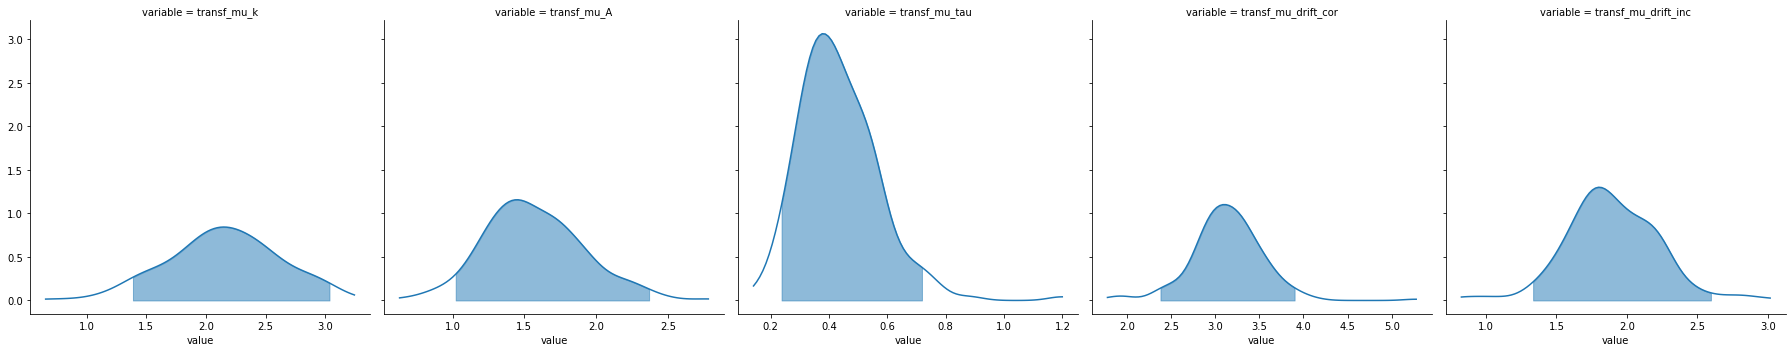

In [12]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

## Posterior predictives

In [13]:
pp_rt, pp_acc = model_fit.get_posterior_predictives(n_posterior_predictives=100)

In [14]:
pp_rt

array([[1.12574928, 1.3262991 , 1.47922591, ..., 4.57210192, 0.93350578,
        1.28149431],
       [1.48526029, 1.34244403, 1.29549071, ..., 1.16715304, 1.52218855,
        1.16203916],
       [1.47523432, 1.50388296, 1.24944925, ..., 2.22339223, 1.58397983,
        1.58569829],
       ...,
       [1.42033225, 1.21050289, 1.2433317 , ..., 1.69689868, 1.61722953,
        1.02697444],
       [1.24556239, 1.15471298, 1.15684635, ..., 1.9141045 , 1.0070316 ,
        1.14836997],
       [1.49559531, 1.86990204, 1.35958159, ..., 1.82024201, 1.66616275,
        1.31533404]])

In [15]:
pp_acc

array([[0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 0., 1., 1.],
       ...,
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 0., 1.]])

In [16]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_incorrect,quant_30_rt_incorrect,quant_50_rt_incorrect,quant_70_rt_incorrect,quant_90_rt_incorrect,quant_10_rt_correct,quant_30_rt_correct,quant_50_rt_correct,quant_70_rt_correct,quant_90_rt_correct
sample,,,,,,,,,,,,,
1,0.805846,1.388278,1.921747,1.090355,1.238195,1.407796,1.615746,2.182597,0.971848,1.148799,1.278370,1.430780,1.814142
2,0.802714,1.388542,3.379581,1.074286,1.260072,1.397638,1.578677,1.933845,0.995742,1.171498,1.274572,1.446435,1.806271
3,0.810021,1.382387,15.036405,1.034060,1.190330,1.390953,1.563869,1.995118,0.967859,1.126155,1.270111,1.426946,1.798567
4,0.815240,1.389397,1.915829,1.105873,1.283407,1.417170,1.634669,1.999893,0.982791,1.132796,1.279579,1.457659,1.825218
5,0.760960,1.390328,3.590419,1.056036,1.216089,1.392831,1.543994,1.904704,0.978549,1.145509,1.273912,1.418574,1.838601
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.797495,1.370139,2.708313,1.033000,1.201542,1.359908,1.545754,1.913142,0.959608,1.115805,1.259763,1.437578,1.793523
97,0.778706,1.362471,4.803176,1.086824,1.235673,1.368656,1.529434,1.976349,0.974123,1.120796,1.244918,1.399491,1.737274
98,0.771399,1.398084,2.269438,1.027356,1.211250,1.336761,1.517896,1.918415,0.993287,1.162717,1.292001,1.487544,1.849492


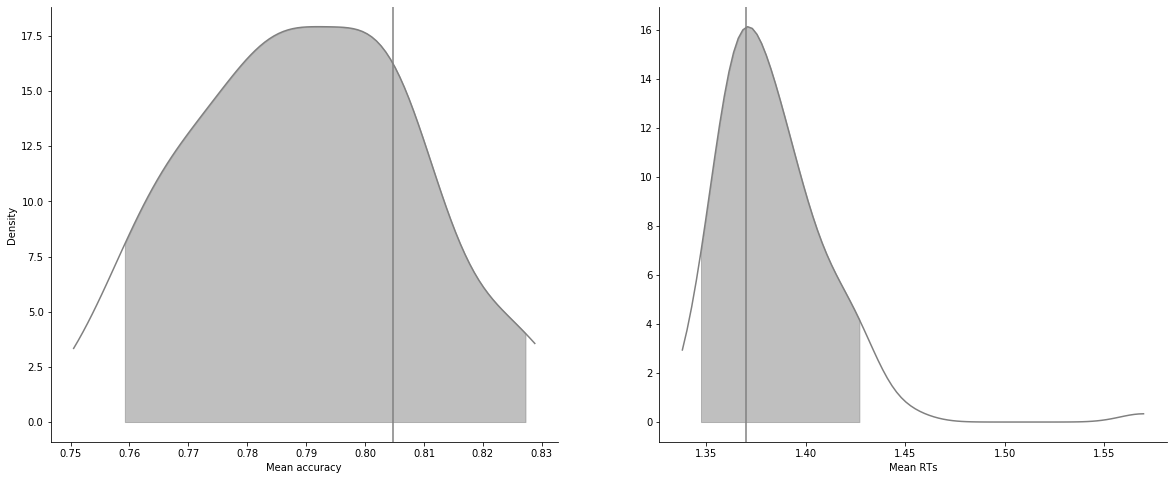

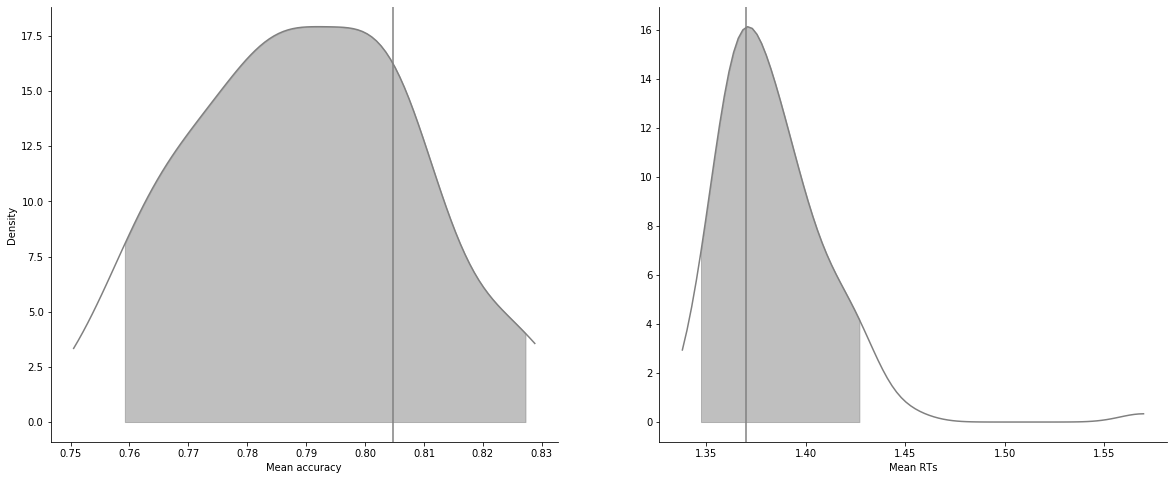

In [17]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

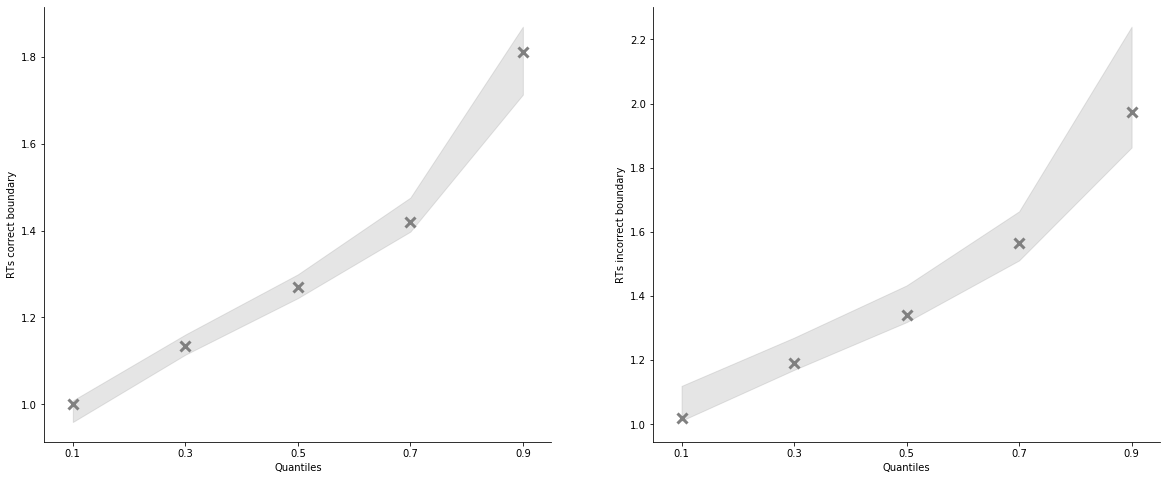

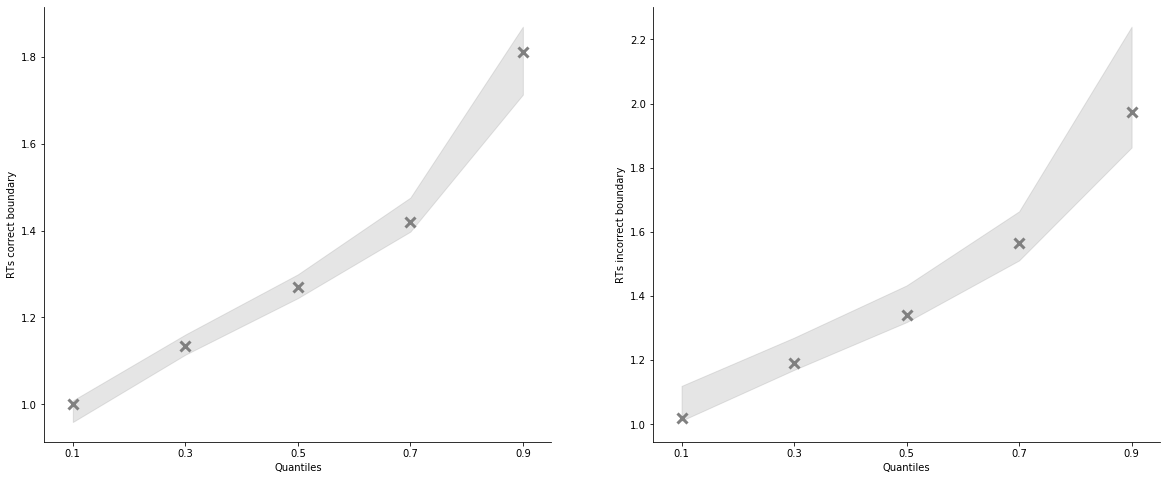

In [18]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

In [19]:
import numpy as np

In [20]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [21]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_rescale,choice_pair,block_bins
0,0,1,1.0,1.0,43.0,39.0,2,1,1.0,1.244082,0.0,2,AB,1
1,1,1,1.0,2.0,60.0,50.0,4,3,1.0,1.101821,1.0,1,CD,1
2,2,1,1.0,3.0,44.0,36.0,4,2,2.0,1.029923,0.0,2,BD,1
3,3,1,1.0,4.0,55.0,55.0,4,3,2.5,1.368007,0.0,2,CD,1
4,4,1,1.0,5.0,52.0,49.0,4,3,3.5,1.039329,1.0,1,CD,1


In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1.0         AB          1            0.860759  1.434121  3.744574   
                        2            0.759494  1.382153  1.032375   
                        3            0.734177  1.410974  2.150350   
                        4            0.822785  1.439075  0.798797   
                        5            0.835443  1.238114  0.858978   
...                                       ...       ...       ...   
3.0         CD          96           0.787500  1.485474  4.176002   
                        97           0.812500  1.416664  1.714188   
                        98           0.812500  1.383156  1.932475   
                        99           0.800000  1.290052  1.231238   
                        100          0.737500  1.354132  1.844615   

                                quant_30_rt_incorrect  quant_30_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.059022             1.180464   
                        2                    1.227820             1.170424   
                        3                    1.276622             1.179753   
                        4                    1.338415             1.260438   
                        5                    1.144897             1.029649   
...                                               ...                  ...   
3.0         CD          96                   1.398904             1.140249   
                        97                   1.270932             1.168010   
                        98                   1.084925             1.113285   
                        99                   1.301388             1.051941   
                        100                  1.222160             1.105308   

                                quant_50_rt_incorrect  quant_50_rt_correct  \
block_label choice_pair sample                                               
1.0         AB          1                    1.329074             1.346226   
                        2                    1.376246             1.309116   
                        3                    1.436966             1.310977   
                        4                    1.423593             1.412983   
                        5                    1.327381             1.157148   
...                                               ...                  ...   
3.0         CD          96                   1.575426             1.300420   
                        97                   1.547070             1.325593   
                        98                   1.375696             1.253485   
                        99                   1.340755             1.207622   
                        100                  1.319105             1.245124   

                                quant_70_rt_incorrect  quant_70_rt_correct  
block_label choice_pair sample                                              
1.0         AB          1                    1.608370             1.499677  
                        2                    1.561471             1.496363  
                        3                    1.595865             1.492847  
                        4                    1.561854             1.563885  
                        5                    1.374521             1.333051  
...                                               ...                  ...  
3.0         CD          96                   1.750714             1.390802  
                        97                   1.801103             1.432659  
                        98                   1.538041             1.423782  
                        99                   1.519882             1.332256  
                        100                  1.406213             1.456816  

[1200 rows x 9 columns]

In [23]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_incorrect  \
block_bins sample                                                             
1          1            0.800000  1.403282  1.560680               1.366512   
           2            0.716667  1.442552  2.535861               1.283362   
           3            0.833333  1.365043  2.224025               1.302255   
           4            0.800000  1.404765  1.472106               1.228257   
           5            0.741667  1.399735  2.021518               1.264874   
...                          ...       ...       ...                    ...   
8          96           0.711864  1.296937  1.456713               1.228811   
           97           0.805085  1.362062  1.232441               1.269977   
           98           0.864407  1.454469  2.977673               1.321864   
           99           0.788136  1.303064  0.748959               1.243530   
           100          0.830508  1.359177  1.980752               1.153523   

                   quant_30_rt_correct  quant_50_rt_incorrect  \
block_bins sample                                               
1          1                  1.122637               1.566371   
           2                  1.165655               1.413031   
           3                  1.127995               1.454318   
           4                  1.188385               1.456359   
           5                  1.122417               1.639039   
...                                ...                    ...   
8          96                 1.096231               1.341628   
           97                 1.148927               1.451388   
           98                 1.107797               1.576061   
           99                 1.123273               1.310014   
           100                1.125232               1.374853   

                   quant_50_rt_correct  quant_70_rt_incorrect  \
block_bins sample                                               
1          1                  1.215307               1.798738   
           2                  1.287414               1.557225   
           3                  1.281200               1.522000   
           4                  1.306979               1.585430   
           5                  1.225107               1.714959   
...                                ...                    ...   
8          96                 1.208667               1.454003   
           97                 1.245526               1.682194   
           98                 1.280240               1.921414   
           99                 1.235647               1.440721   
           100                1.257428               1.525210   

                   quant_70_rt_correct  
block_bins sample                       
1          1                  1.453987  
           2                  1.493541  
           3                  1.442691  
           4                  1.468994  
           5                  1.385242  
...                                ...  
8          96                 1.322500  
           97                 1.415230  
           98                 1.518496  
           99                 1.429925  
           100                1.438314  

[800 rows x 9 columns]

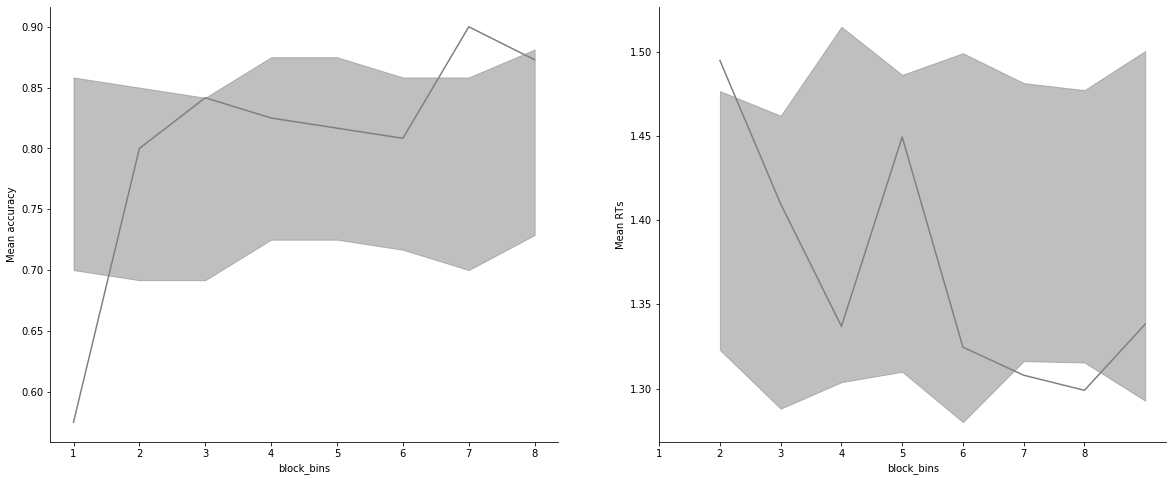

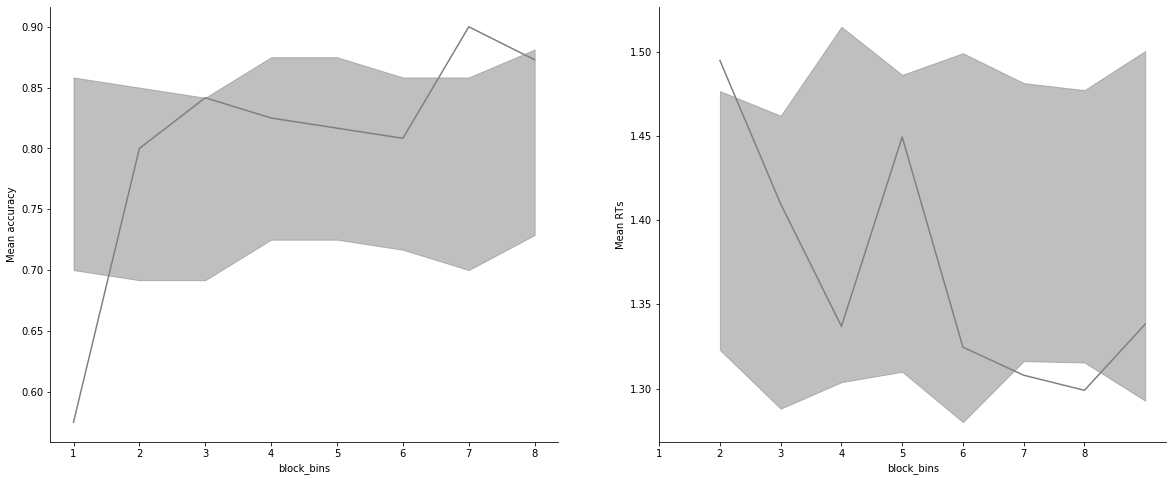

In [24]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8))

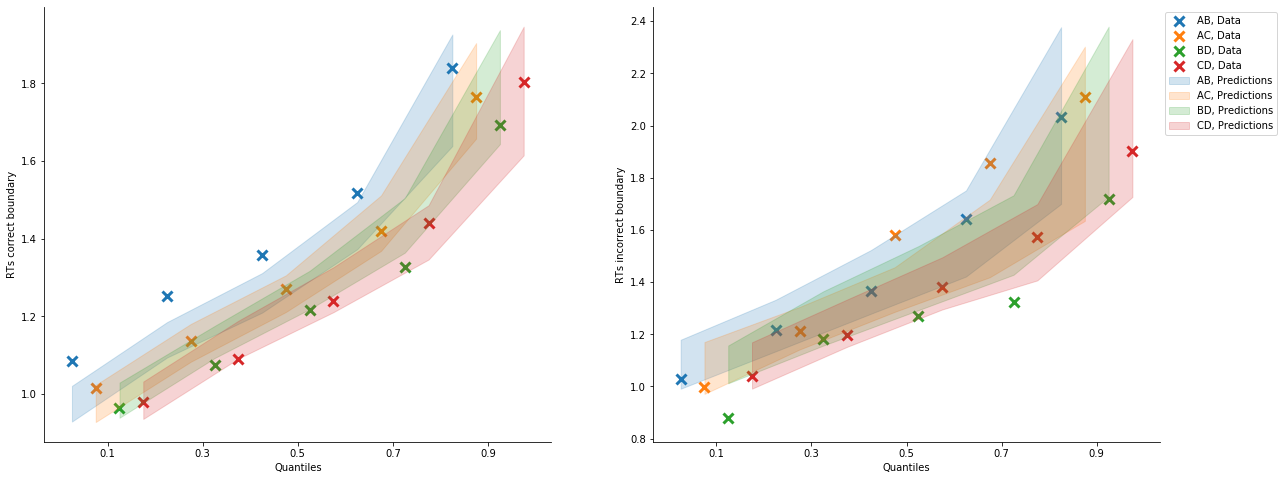

In [25]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=100,
    grouping_var='choice_pair',
    kind='shades',
    quantiles=[.1, .3, .5, .7, .9]);

### Get last values for eventual further sampling

In [26]:
sv = model_fit.last_values
sv

,chain,draw,warmup,mu_A,mu_drift_cor,mu_drift_inc,mu_k,mu_tau,sd_A,sd_drift_cor,...,z_drift_inc[3],z_drift_inc[4],z_k[1],z_k[2],z_k[3],z_k[4],z_tau[1],z_tau[2],z_tau[3],z_tau[4]
99,0,99,0,0.511738,2.893861,2.079390,2.847426,-0.350890,0.793153,0.458672,...,-0.116397,-1.890663,-1.808638,0.379939,0.668317,-1.835352,-0.565523,-1.80357,-0.786236,-1.278169
199,1,99,0,0.753872,2.952279,1.533839,1.079686,-0.440958,0.427311,0.289882,...,-0.088794,-0.624144,-0.442396,0.413093,0.071637,1.670601,0.631235,-0.70585,0.477154,-2.311231
